In [1]:
import pandas as pd

In [2]:
import os

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.patches as mpatches

In [5]:
import numpy

In [6]:
import itertools

In [7]:
import scipy.stats

In [8]:
os.chdir("C:\\Users\\alexi\\Downloads") 
#Set working directory so that Python knows where to find the file

In [12]:
CLABSI = pd.read_csv(r'\Users\alexi\Downloads\cdph_clabsi_odp_2022.csv',  encoding = "ISO-8859-1")

In [13]:
CLABSI

,Year,State,HAI,Facility_ID,Facility_Name,County,Hospital_Category_RiskAdjustment,Facility_Type,Infections_Reported,Infections_Predicted,Central_line_Days,SIR,SIR_CI_95_Lower_Limit,SIR_CI_95_Upper_Limit,Comparison,Met_2020_Goal,Months,SIR_2015,Notes
0,2022,California,Central Line-Associated Bloodstream Infection ...,NaN,STATE OF CALIFORNIA POOLED DATA - Acute Care H...,NaN,STATE OF CALIFORNIA POOLED DATA - Acute Care H...,STATE OF CALIFORNIA POOLED DATA - Acute Care H...,2330.0,2803.06,2810304.0,0.83,0.80,0.87,Better,No,NaN,0.97,NaN
1,2022,California,Central Line-Associated Bloodstream Infection ...,NaN,STATE OF CALIFORNIA POOLED DATA - Long-Term Ac...,NaN,STATE OF CALIFORNIA POOLED DATA - Long-Term Ac...,STATE OF CALIFORNIA POOLED DATA - Long-Term Ac...,334.0,252.27,147897.0,1.32,1.19,1.47,Worse,No,NaN,1.40,NaN
2,2022,California,Central Line-Associated Bloodstream Infection ...,NaN,STATE OF CALIFORNIA POOLED DATA - Critical Acc...,NaN,STATE OF CALIFORNIA POOLED DATA - Critical Acc...,STATE OF CALIFORNIA POOLED DATA - Critical Acc...,3.0,2.51,9192.0,1.20,0.30,3.26,Same,No,NaN,1.18,NaN
3,2022,California,Central Line-Associated Bloodstream Infection ...,NaN,STATE OF CALIFORNIA POOLED DATA - Rehabilitati...,NaN,STATE OF CALIFORNIA POOLED DATA - Rehabilitati...,STATE OF CALIFORNIA POOLED DATA - Rehabilitati...,10.0,19.41,39818.0,0.52,0.26,0.92,Better,No,NaN,1.68,NaN
4,2022,California,Central Line-Associated Bloodstream Infection ...,140000011.0,Alameda Hospital,Alameda,Acute Care Hospital,"Community, <125 Beds",2.0,2.05,2858.0,0.98,0.16,3.23,Same,No,12.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,2022,California,Central Line-Associated Bloodstream Infection ...,50000039.0,Ventura County Medical Center,Ventura,Acute Care Hospital,Major Teaching,7.0,3.84,3872.0,1.82,0.80,3.61,Same,No,12.0,1.95,NaN
457,2022,California,Central Line-Associated Bloodstream Infection ...,630010957.0,Ventura County Medical Center - Santa Paula Ho...,Ventura,Acute Care Hospital,Major Teaching,0.0,0.34,425.0,0.00,0.00,10.69,Same,Yes,12.0,NaN,¥ See Data Dictionary
458,2022,California,Central Line-Associated Bloodstream Infection ...,30000149.0,Sutter Davis Hospital,Yolo,Acute Care Hospital,"Community, <125 Beds",0.0,0.46,760.0,0.00,0.00,8.01,Same,Yes,12.0,0.00,¥ See Data Dictionary
459,2022,California,Central Line-Associated Bloodstream Infection ...,30000146.0,Woodland Memorial Hospital,Yolo,Acute Care Hospital,"Community, <125 Beds",0.0,1.44,2073.0,0.00,0.00,2.09,Same,Yes,12.0,0.00,NaN


In [14]:
# Exploratory Data Analysis (EDA)
print(CLABSI.describe())
print(CLABSI.info())


         Year   Facility_ID  Infections_Reported  Infections_Predicted  \
count   461.0  4.570000e+02           457.000000            457.000000   
mean   2022.0  3.426487e+08            11.715536             13.467199   
std       0.0  3.571601e+08           110.278963            131.817569   
min    2022.0  3.000004e+07             0.000000              0.000000   
25%    2022.0  7.000013e+07             0.000000              0.340000   
50%    2022.0  1.400002e+08             2.000000              2.370000   
75%    2022.0  6.300164e+08             7.000000              8.810000   
max    2022.0  9.300017e+08          2330.000000           2803.060000   

       Central_line_Days         SIR  SIR_CI_95_Lower_Limit  \
count       4.570000e+02  365.000000             365.000000   
mean        1.316066e+04    0.920384               0.360630   
std         1.317135e+05    1.028752               0.498444   
min         0.000000e+00    0.000000               0.000000   
25%         7.1300

In [ ]:
#insights gathered 
    #insight 1: The mean number of reported infections is 11.72, with a standard deviation of 110.28, indicating a wide variation in infection counts across hospitals.
    #insight 2: The mean SIR (Standardized Infection Ratio) is 0.92, with a standard deviation of 1.03. This suggests that, on average, the observed CLABSI rates are slightly lower than expected based on national baseline data.
    #insight 3: The presence of missing values, especially in critical columns like Facility_ID and SIR, may require imputation or exclusion of incomplete records
    #insight 4: The Notes column has a substantial number of missing values (82 out of 461), indicating that additional information or context may be missing for some entries.

In [ ]:
#time to make this a graph 

In [19]:
df = pd.DataFrame(CLABSI)

In [20]:
df

,Year,State,HAI,Facility_ID,Facility_Name,County,Hospital_Category_RiskAdjustment,Facility_Type,Infections_Reported,Infections_Predicted,Central_line_Days,SIR,SIR_CI_95_Lower_Limit,SIR_CI_95_Upper_Limit,Comparison,Met_2020_Goal,Months,SIR_2015,Notes
0,2022,California,Central Line-Associated Bloodstream Infection ...,NaN,STATE OF CALIFORNIA POOLED DATA - Acute Care H...,NaN,STATE OF CALIFORNIA POOLED DATA - Acute Care H...,STATE OF CALIFORNIA POOLED DATA - Acute Care H...,2330.0,2803.06,2810304.0,0.83,0.80,0.87,Better,No,NaN,0.97,NaN
1,2022,California,Central Line-Associated Bloodstream Infection ...,NaN,STATE OF CALIFORNIA POOLED DATA - Long-Term Ac...,NaN,STATE OF CALIFORNIA POOLED DATA - Long-Term Ac...,STATE OF CALIFORNIA POOLED DATA - Long-Term Ac...,334.0,252.27,147897.0,1.32,1.19,1.47,Worse,No,NaN,1.40,NaN
2,2022,California,Central Line-Associated Bloodstream Infection ...,NaN,STATE OF CALIFORNIA POOLED DATA - Critical Acc...,NaN,STATE OF CALIFORNIA POOLED DATA - Critical Acc...,STATE OF CALIFORNIA POOLED DATA - Critical Acc...,3.0,2.51,9192.0,1.20,0.30,3.26,Same,No,NaN,1.18,NaN
3,2022,California,Central Line-Associated Bloodstream Infection ...,NaN,STATE OF CALIFORNIA POOLED DATA - Rehabilitati...,NaN,STATE OF CALIFORNIA POOLED DATA - Rehabilitati...,STATE OF CALIFORNIA POOLED DATA - Rehabilitati...,10.0,19.41,39818.0,0.52,0.26,0.92,Better,No,NaN,1.68,NaN
4,2022,California,Central Line-Associated Bloodstream Infection ...,140000011.0,Alameda Hospital,Alameda,Acute Care Hospital,"Community, <125 Beds",2.0,2.05,2858.0,0.98,0.16,3.23,Same,No,12.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,2022,California,Central Line-Associated Bloodstream Infection ...,50000039.0,Ventura County Medical Center,Ventura,Acute Care Hospital,Major Teaching,7.0,3.84,3872.0,1.82,0.80,3.61,Same,No,12.0,1.95,NaN
457,2022,California,Central Line-Associated Bloodstream Infection ...,630010957.0,Ventura County Medical Center - Santa Paula Ho...,Ventura,Acute Care Hospital,Major Teaching,0.0,0.34,425.0,0.00,0.00,10.69,Same,Yes,12.0,NaN,¥ See Data Dictionary
458,2022,California,Central Line-Associated Bloodstream Infection ...,30000149.0,Sutter Davis Hospital,Yolo,Acute Care Hospital,"Community, <125 Beds",0.0,0.46,760.0,0.00,0.00,8.01,Same,Yes,12.0,0.00,¥ See Data Dictionary
459,2022,California,Central Line-Associated Bloodstream Infection ...,30000146.0,Woodland Memorial Hospital,Yolo,Acute Care Hospital,"Community, <125 Beds",0.0,1.44,2073.0,0.00,0.00,2.09,Same,Yes,12.0,0.00,NaN


In [21]:
print(df.columns)

Index(['Year', 'State', 'HAI', 'Facility_ID', 'Facility_Name', 'County',
       'Hospital_Category_RiskAdjustment', 'Facility_Type',
       'Infections_Reported', 'Infections_Predicted', 'Central_line_Days',
       'SIR', 'SIR_CI_95_Lower_Limit', 'SIR_CI_95_Upper_Limit', 'Comparison',
       'Met_2020_Goal', 'Months', 'SIR_2015', 'Notes'],
      dtype='object')


In [24]:
import matplotlib.pyplot as plt

In [25]:
# Assuming df contains 'Infections_Reported' and 'Infections_Predicted' columns

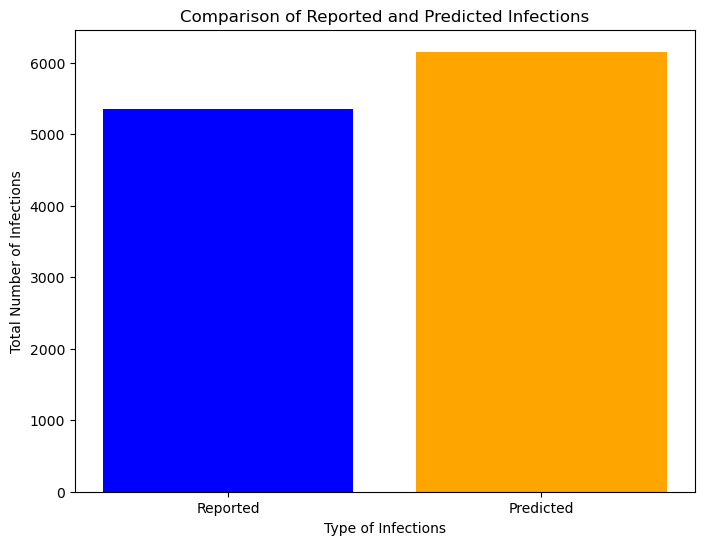

In [27]:
import matplotlib.pyplot as plt

# Assuming df contains 'Infections_Reported' and 'Infections_Predicted' columns

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Reported', 'Predicted'], [df['Infections_Reported'].sum(), df['Infections_Predicted'].sum()], color=['blue', 'orange'])
plt.xlabel('Type of Infections')
plt.ylabel('Total Number of Infections')
plt.title('Comparison of Reported and Predicted Infections')
plt.show()
